# DATA EXPLORATION

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading data
housingdata = pd.read_csv('housing.csv')
housingdata.shape
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- the dataset has 20640 rows, and 10 columns
- ocean_proximity is a non-numeric feature > this needs to be changed
- total_bedrooms also have missing values

In [3]:
# count every unique value in the column
housingdata["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
housingdata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

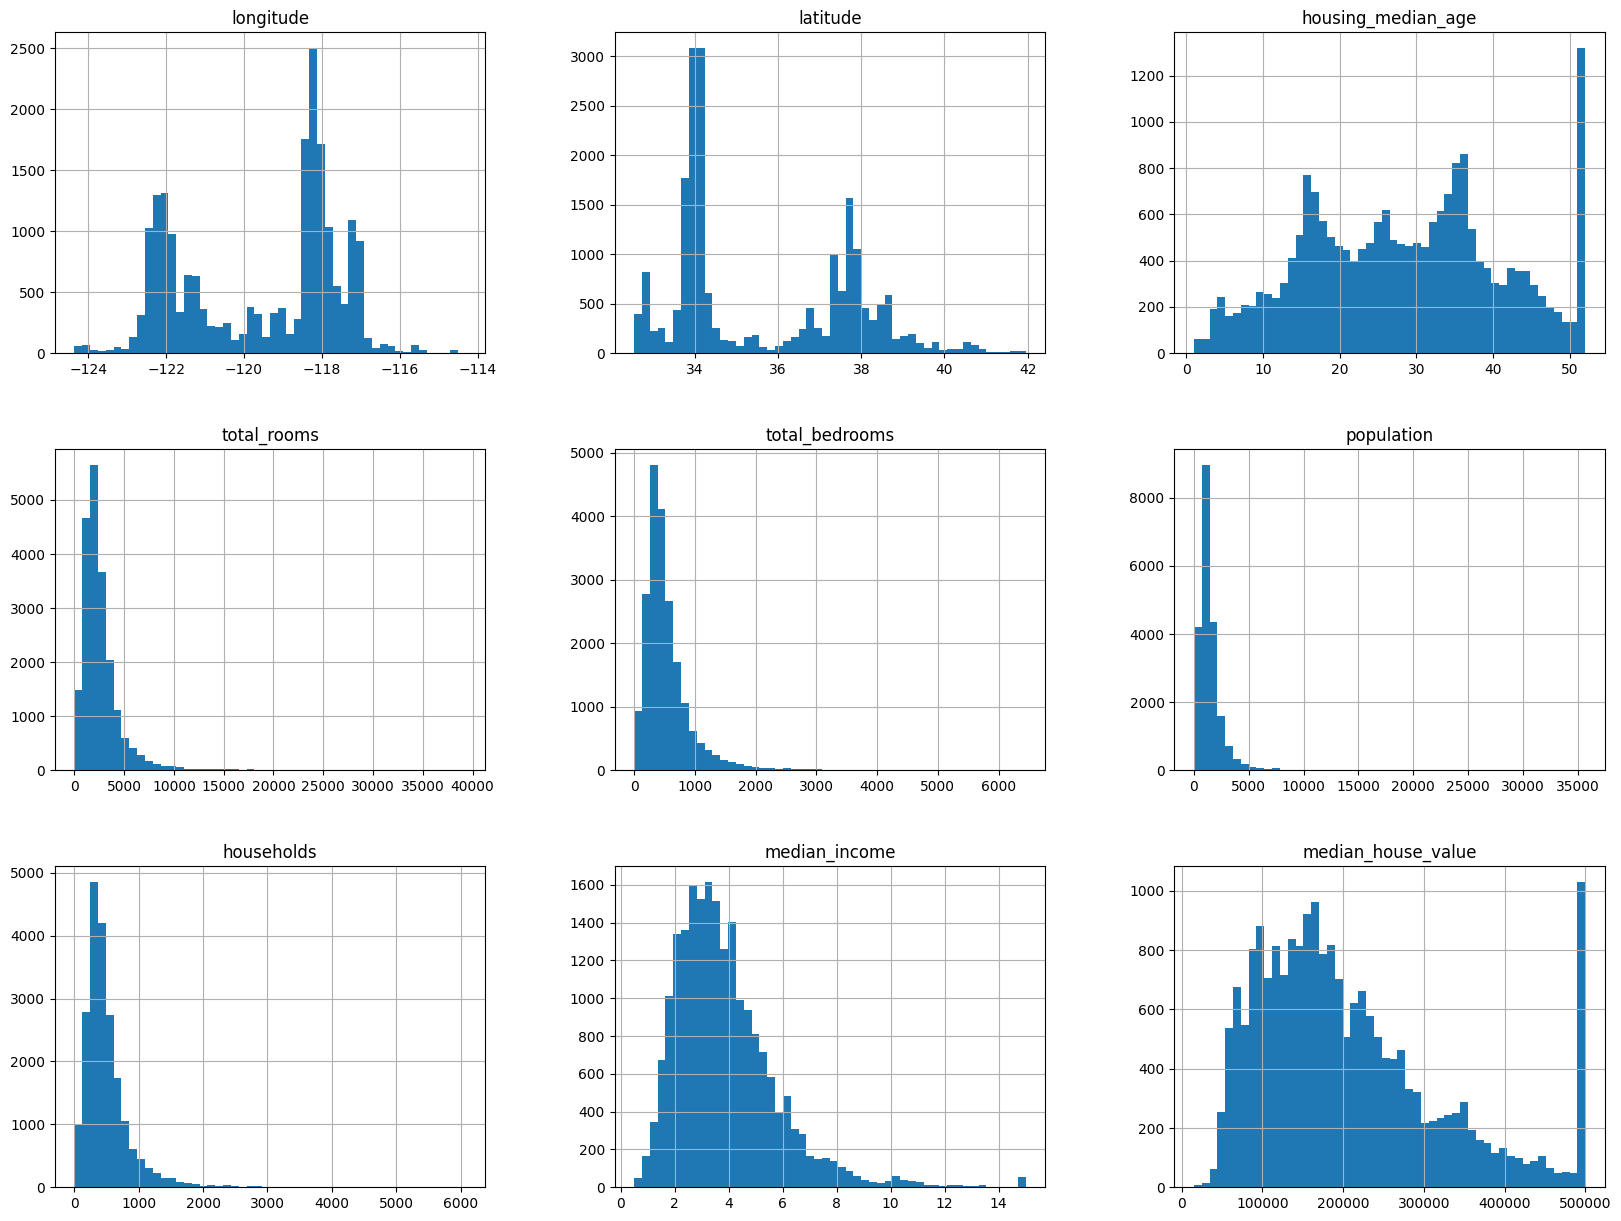

In [5]:
# plotting the data
housingdata.hist(bins=50, figsize=(20,15))

- 500k median house value cap as well as 50+ year house ages are grouped together

<Axes: xlabel='longitude', ylabel='latitude'>

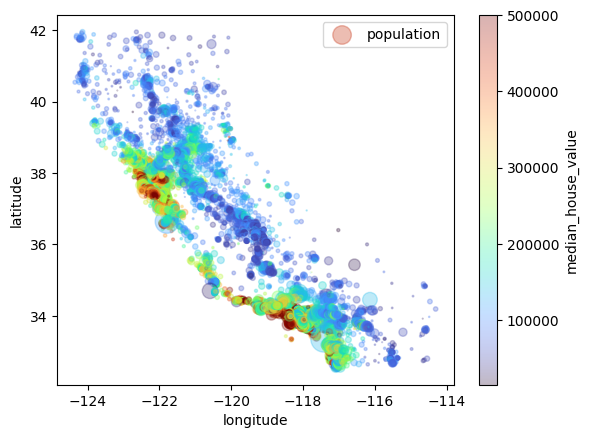

In [6]:
# producing a similar shape as the map of California, each dot representing districts in California
housingdata.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, s=housingdata["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("turbo"))

- more observations in darker clusters, since they are more busier locations
- housing towards the left may potentially be more expensive since it is closer to the ocean
- larger dots = higher populations in certain areas
- colours indicate house value

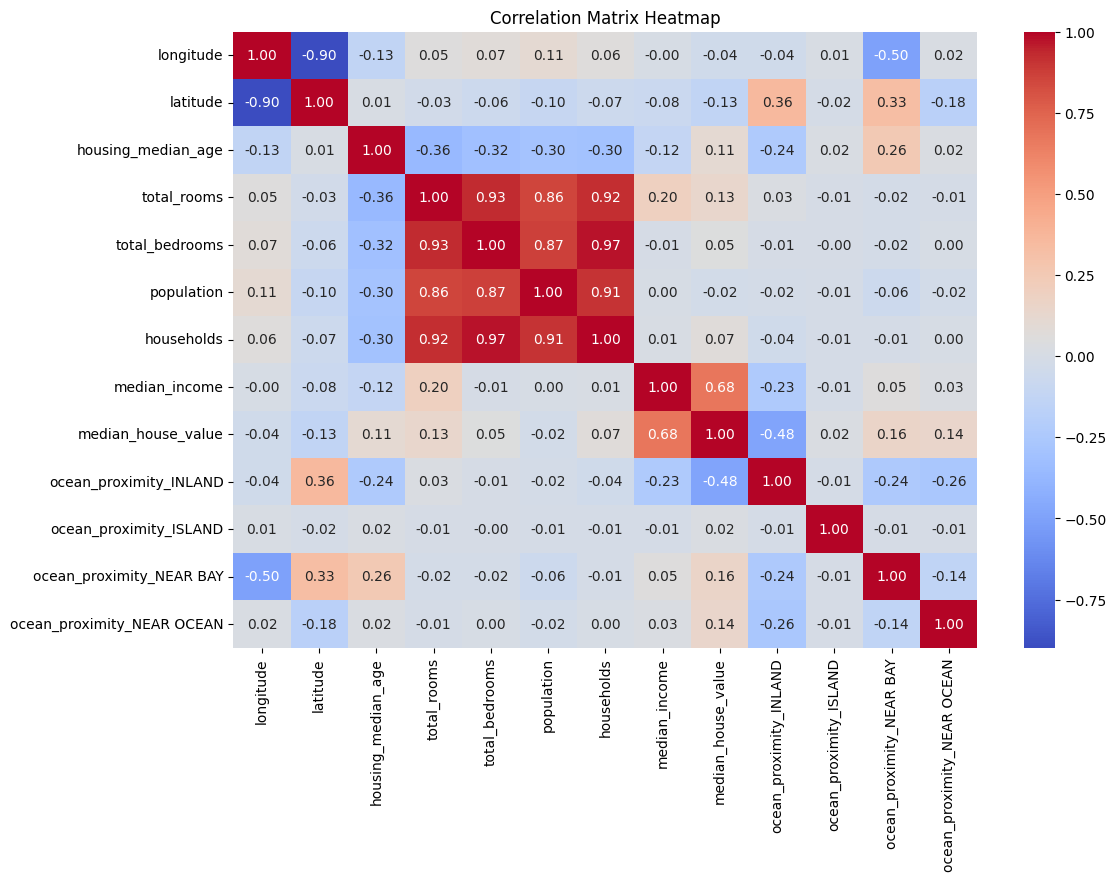

In [7]:
# one-hot encode 'ocean_proximity' to make sure the non-integer values do not interfere
housing_encoded = pd.get_dummies(housingdata, columns=['ocean_proximity'], drop_first=True)

# fill missing values in 'total_bedrooms' column with the calculated mean
mean_total_bedrooms = housing_encoded['total_bedrooms'].mean()
housing_encoded['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

# convert from true/false to binary (0 or 1)
housing_encoded = housing_encoded.astype(int)

# compute correlation matrix
correlation_matrix = housing_encoded.corr()

# display correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


- latitude correlation indicates the more further up north, tends to be cheaper housing

In [8]:
# checking correlations of median house value compared to all other features of the dataset
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.678402
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.041666
latitude                     -0.134373
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

- most correlating is the median income compared to the median house value.
- there is also an opposite correlation of the more the houses are towards the ocean, the more the house value goes up

IMPUTING MISSING VALUES

In [9]:
housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   longitude                   20640 non-null  int32
 1   latitude                    20640 non-null  int32
 2   housing_median_age          20640 non-null  int32
 3   total_rooms                 20640 non-null  int32
 4   total_bedrooms              20640 non-null  int32
 5   population                  20640 non-null  int32
 6   households                  20640 non-null  int32
 7   median_income               20640 non-null  int32
 8   median_house_value          20640 non-null  int32
 9   ocean_proximity_INLAND      20640 non-null  int32
 10  ocean_proximity_ISLAND      20640 non-null  int32
 11  ocean_proximity_NEAR BAY    20640 non-null  int32
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int32
dtypes: int32(13)
memory usage: 1.0 MB


# FEATURE ENGINEERING

In [10]:
# storing the encoded dataset to a panda dataframe
cleaned_housing = pd.DataFrame(housing_encoded)
cleaned_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0


In [11]:
# Calculate the amount of rooms in total in a household to prevent multi-collinearity
cleaned_housing['household_rooms'] = cleaned_housing['total_rooms'] / cleaned_housing['households']
# Calculate the amount of people per household to prevent multi-collinearity
cleaned_housing['household_population'] = cleaned_housing['population'] / cleaned_housing['households']
# Calculate bedroom ratio and add it as a new feature
cleaned_housing['bedroom_ratio'] = cleaned_housing['total_bedrooms'] / cleaned_housing['total_rooms']

# Drop the original 'total_bedrooms' and 'total_rooms' features
cleaned_housing.drop(['total_bedrooms', 'total_rooms', 'population', 'households' ], axis=1, inplace=True)

# Check the updated dataset
print(cleaned_housing.head())

   longitude  latitude  housing_median_age  median_income  median_house_value  \
0       -122        37                  41              8              452600   
1       -122        37                  21              8              358500   
2       -122        37                  52              7              352100   
3       -122        37                  52              5              341300   
4       -122        37                  52              3              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  househo

In [12]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each numerical feature
Q1 = cleaned_housing.quantile(0.25)
Q3 = cleaned_housing.quantile(0.75)

# Calculate the interquartile range (IQR) for each numerical feature
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each feature
outliers = (cleaned_housing < lower_bound) | (cleaned_housing > upper_bound)

# Remove outliers from the dataset
cleaned_housing_no_outliers = cleaned_housing[~outliers.any(axis=1)]

# Display the shape of the dataset before and after removing outliers
print("Shape before removing outliers:", cleaned_housing.shape)
print("Shape after removing outliers:", cleaned_housing_no_outliers.shape)


Shape before removing outliers: (20640, 12)
Shape after removing outliers: (13558, 12)


# Data Splitting

In [13]:
# dropping median house value, since that is what is going to be predicted
X=cleaned_housing.drop(columns=['median_house_value'])
X.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,household_rooms,household_population,bedroom_ratio
0,-122,37,41,8,0,0,1,0,6.984127,2.555556,0.146591
1,-122,37,21,8,0,0,1,0,6.238137,2.109842,0.155797
2,-122,37,52,7,0,0,1,0,8.288136,2.802260,0.129516
3,-122,37,52,5,0,0,1,0,5.817352,2.547945,0.184458
4,-122,37,52,3,0,0,1,0,6.281853,2.181467,0.172096


In [14]:
# y value will be the median_house_value
y=cleaned_housing['median_house_value']
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int32

#  Model Training & Evaluation

In [15]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split (X,y, test_size = 0.2, random_state=42)

#conversion is to use the arrays with other libraries or functions that require NumPy arrays rather than Pandas DataFrames
X_t0, X_t1, y_t0, y_t1 = X_train1.to_numpy(), X_test1.to_numpy(), y_train1.to_numpy(), y_test1.to_numpy()

In [16]:
# used for standardization, which scales the features to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler

# scales first 8 columns of data
scaler = StandardScaler().fit(X_t0 [:, :8])

# function for copying data from X to A, before applying scaler transformation
def preprocessorFnc(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform (A[:, :8])
    return A

X_train_scaled, X_test_scaled = preprocessorFnc(X_t0), preprocessorFnc (X_t1)

In [17]:
# Linear Regression training
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train_scaled, y_t0)

# Linear Regression
train_preds_lr = LR.predict(X_train_scaled)
test_preds_lr = LR.predict(X_test_scaled)

# MAE calculation for Linear Regression
train_mae_lr = mae(train_preds_lr, y_t0)
test_mae_lr = mae(test_preds_lr, y_t1)

# comparison of the the train and test for Linear Regression
print("Mean Squared Error for trained data using baseline model (Linear Regression): " + str(mse(LR.predict(X_train_scaled), y_t0, squared=False)))
print("Mean Squared Error for test data using baseline model (Linear Regression): " + str(mse(LR.predict(X_test_scaled), y_t1, squared=False)))

print("\nMean Absolute Error for trained data using Linear Regression:", train_mae_lr)
print("Mean Absolute Error for test data using Linear Regression:", test_mae_lr)

# R^2 value of the LR model
print ("\nThe R-Squared Value for Linear Regression training data is: " + str(LR.score(X_train_scaled, y_t0)))
print ("The R-Squared Value for Linear Regression testing data is: " + str(LR.score(X_test_scaled, y_t1)))

Mean Squared Error for trained data using baseline model (Linear Regression): 72877.1057972267
Mean Squared Error for test data using baseline model (Linear Regression): 79444.20259159022

Mean Absolute Error for trained data using Linear Regression: 53134.83490587485
Mean Absolute Error for test data using Linear Regression: 55328.84203674192

The R-Squared Value for Linear Regression training data is: 0.6026960566427315
The R-Squared Value for Linear Regression testing data is: 0.5183655308981427


In [18]:
# Random Forest Regression training
from sklearn.ensemble import RandomForestRegressor

# MSE
rfr = RandomForestRegressor(max_depth=25).fit(X_train_scaled, y_t0)
print("Mean Squared Error for trained data using Random Forest Regression: " + str(mse(rfr.predict(X_train_scaled), y_t0, squared=False)))
print("Mean Squared Error for test data Random Forest Regression: " + str(mse(rfr.predict(X_test_scaled), y_t1, squared=False)))

# Random Forest Regression MAE
train_preds_rfr = rfr.predict(X_train_scaled)
test_preds_rfr = rfr.predict(X_test_scaled)

# MAE calculation for Random Forest Regression
train_mae_rfr = mae(train_preds_rfr, y_t0)
test_mae_rfr = mae(test_preds_rfr, y_t1)

print("\nMean Absolute Error for trained data using Random Forest Regression:", train_mae_rfr)
print("Mean Absolute Error for test data using Random Forest Regression:", test_mae_rfr)

# R^2 value
print ("\nThe R-Squared Value for Random Forest training is: " + str(rfr.score(X_train_scaled, y_t0)))
print ("The R-Squared Value for Random Forest testing is: " + str(rfr.score(X_test_scaled, y_t1)))

Mean Squared Error for trained data using Random Forest Regression: 21457.258950021413
Mean Squared Error for test data Random Forest Regression: 57585.53684631131

Mean Absolute Error for trained data using Random Forest Regression: 14459.669614264225
Mean Absolute Error for test data using Random Forest Regression: 38738.085262667766

The R-Squared Value for Random Forest training is: 0.96555793941076
The R-Squared Value for Random Forest testing is: 0.7469420532871027


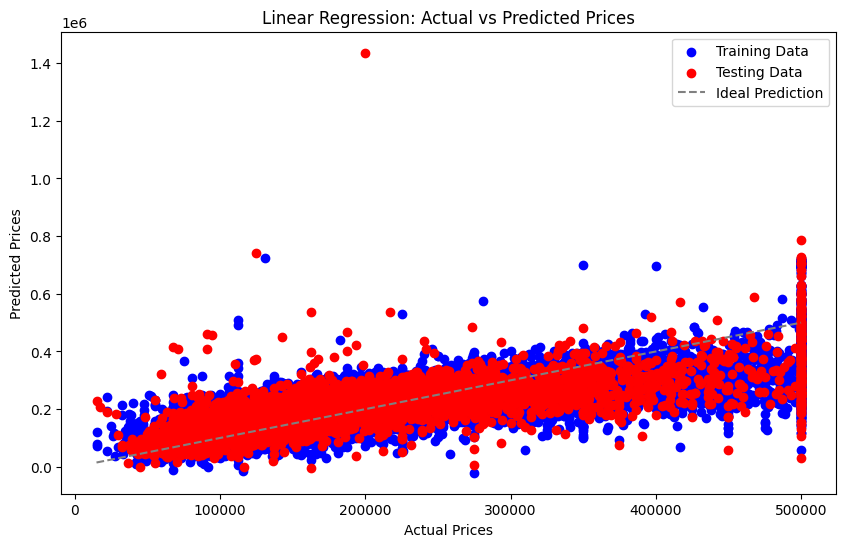

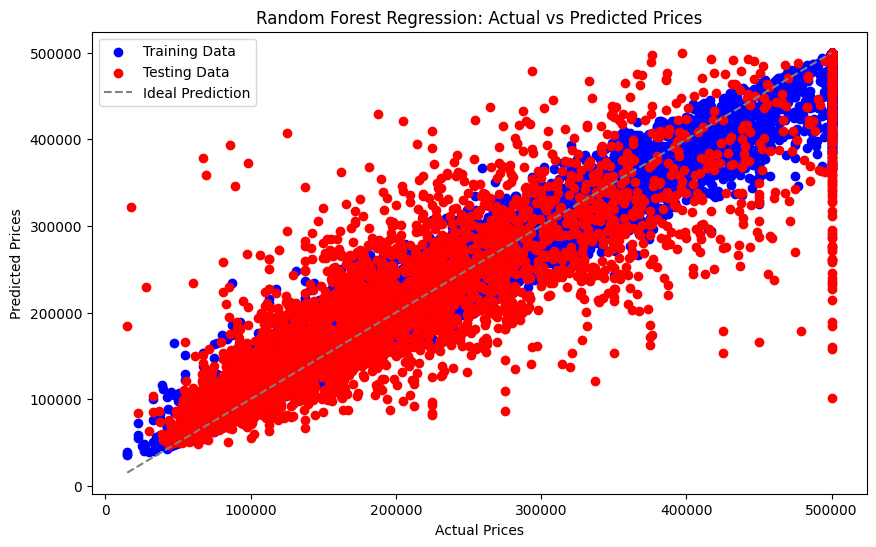

In [19]:
# Visualizing Linear Regression Model Performance
plt.figure(figsize=(10, 6))
plt.scatter(y_t0, LR.predict(X_train_scaled), color='blue', label='Training Data')
plt.scatter(y_t1, LR.predict(X_test_scaled), color='red', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='gray', label='Ideal Prediction')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Visualizing Random Forest Regression Model Performance
plt.figure(figsize=(10, 6))
plt.scatter(y_t0, rfr.predict(X_train_scaled), color='blue', label='Training Data')
plt.scatter(y_t1, rfr.predict(X_test_scaled), color='red', label='Testing Data')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='gray', label='Ideal Prediction')
plt.title('Random Forest Regression: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()
